In [1]:
import matplotlib.pyplot as pl

In [2]:
reports = ['v04_Rac1_dominant', 
           'v04_RhoA_dominant',
           'v04_equal_oscillations']
files = ['reports/{}/base/special_basins.txt'.format(r) for r in reports]

In [3]:
def parse_raw_basins(raw):
#     TODO: deal with empty text in first column (repeated from previous)
    
    import re
    lines = raw.split("\n")[1:]    
    names = re.findall('\S+', lines[0])
    basins = []
    values = []    
    for line in lines[1:]:
        if line.startswith(" "):
            # from previous line
            line = cols[0] + line
        cols = re.findall('\S+', line)
        values.append(float(cols[3]))
        a = cols[0]
        b = cols[1]
        max_len = max(len(a), len(b))        
        a = a*max_len
        b = b*max_len
        cycle = []
        for i in range(max_len):
            cycle.append(a[i]+b[i])
        
        basins.append("\n".join(cycle))
        
    return names, basins, values

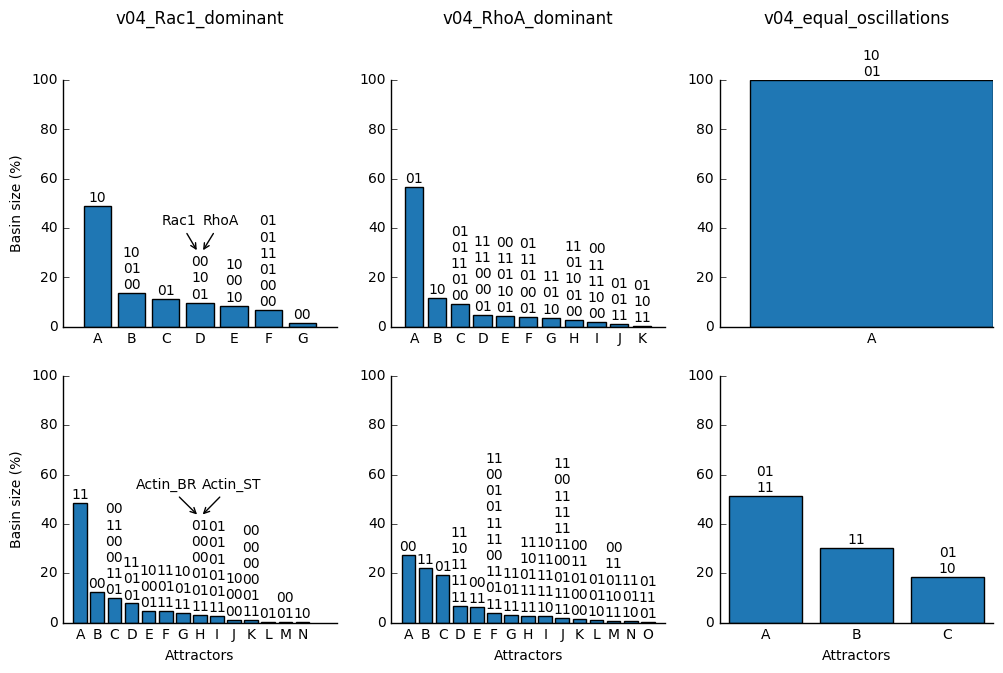

In [7]:
def add_annotation(ax, names, x, y, text_offset=20):
    ax.annotate(names[0], xy=(x-0.05, y), 
            textcoords='offset points',
            xytext=(-1, text_offset), 
            arrowprops=dict(arrowstyle='->'), 
            horizontalalignment='right')
    ax.annotate(names[1], xy=(x + 0.05, y), 
            textcoords='offset points',
            xytext=(1, text_offset), 
            arrowprops=dict(arrowstyle='->'),             
            horizontalalignment='left')


def plot_basins(data, ax, basins, values):    
#     labels = range(1, len(values)+1) # [chr(ord('A') + n) for n in range(len(values))]
    labels = [chr(ord('A') + n) for n in range(len(values))]

    # bar_color = pl.rcParams['axes.color_cycle'][0];
    bar_color = '#1f77b4';

    # pl.title('Rac1 dominant')
#     ax = pl.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('left')
    pl.setp(ax.get_yticklabels(), visible=True)

    ax.bar(range(1, len(values)+1), values, align='center', antialiased=True, edgecolor='black', color=bar_color)
    ax.set_xticks(range(1, len(labels)+1))
    ax.set_xticklabels(labels)    

    font = {'weight':'normal',
            'family': 'sans-serif'}
    for idx, basin in enumerate(basins):
        ax.text(idx+1, values[idx] + 0.5, basin, fontdict=font, ha='center', va='bottom')


fig, axes = pl.subplots(2, 3, sharey=True, figsize = (12, 7))
names = []
for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ =file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r)    
    names.append(nm)
    plot_basins(data_r, axes[0, idx], basins, values)   
    axes[0, idx].set_title(reports[idx], y=1.2)
    
    
    
    nm, basins, values = parse_raw_basins(data_a)    
    names.append(nm)
    plot_basins(data_a, axes[1, idx], basins, values)    
    axes[1, idx].set_xlabel('Attractors')

axes[0, 0].set_ylabel('Basin size (%)')
axes[1, 0].set_ylabel('Basin size (%)')
    
add_annotation(axes[0,0], names[0], 4, 30)
add_annotation(axes[1,0], names[1], 8, 43)

fig.savefig('charts/fig_2_a.svg', bbox_inches='tight')
fig.savefig('charts/fig_2_a.png', bbox_inches='tight', dpi=300)

In [5]:
def transform_basins(basins, values):
    oscillations_label = '??'
    basins_t = {'00':0.0, '01':0.0, '10':0.0, '11':0.0, oscillations_label:0.0}

    for basin, value in zip(basins, values):
        if basin in basins_t:
            basins_t[basin] += value
        else:
            basins_t[oscillations_label] += value
    return zip(*sorted(basins_t.items()))

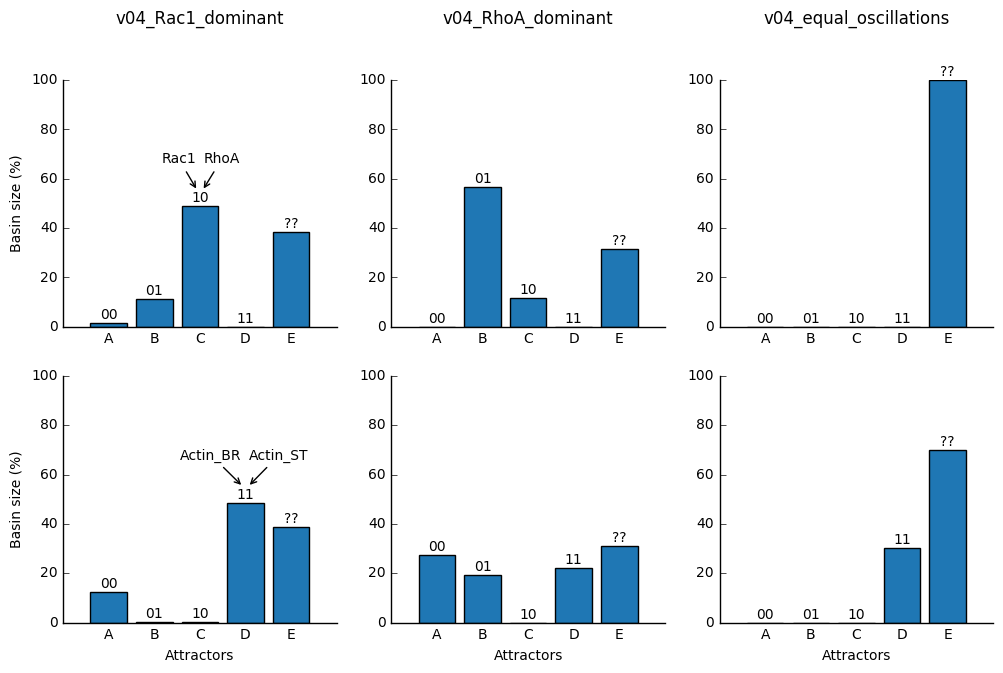

In [8]:
fig, axes = pl.subplots(2, 3, sharey=True, figsize = (12, 7))
names = []
for idx, file in enumerate(files):
    with open(file, 'r') as file:
        data_a, data_r, _ =file.read().split("\n\n\n\n")
        
    nm, basins, values = parse_raw_basins(data_r)    
    names.append(nm)
    bt, vt = transform_basins(basins, values)
    plot_basins(data_r, axes[0, idx], bt, vt)   
    axes[0, idx].set_title(reports[idx], y=1.2)
    
    nm, basins, values = parse_raw_basins(data_a)    
    bt, vt = transform_basins(basins, values)
    names.append(nm)
    plot_basins(data_a, axes[1, idx], bt, vt)
    axes[1, idx].set_xlabel('Attractors')

axes[0, 0].set_ylabel('Basin size (%)')
axes[1, 0].set_ylabel('Basin size (%)')
    
    
add_annotation(axes[0,0], names[0], 3, 55)
add_annotation(axes[1,0], names[1], 4, 55)

fig.savefig('charts/fig_2_b.svg', bbox_inches='tight')
fig.savefig('charts/fig_2_b.png', bbox_inches='tight', dpi=300)